In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
car_prices = pd.read_csv("CarPrice_Assignment.csv")
car_prices = car_prices.set_index('car_id')
car_prices

symboling                  car_name fueltype aspiration doornumber  \
car_id                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   
...           ...                       ...      ...        ...        ...   
201            -1           volvo 145e (sw)      gas        std       four   
202            -1               volvo 144ea      gas      turbo       four   
203            -1               volvo 244dl      gas        std       four   
204            -1                 volvo 246   diesel      turbo       four   
205            -1               volvo 264gl      gas      turbo       four   

            carbody drivewheel enginelocation  wheelbase  carlength  ...  \
car_id                                                               ...   
1       convertible        rwd          front       88.6      168.8  ...   
2       convertible        rwd          front       88.6      168.8  ...   
3         hatchback        rwd          front       94.5      171.2  ...   
4             sedan        fwd          front       99.8      176.6  ...   
5             sedan        4wd          front       99.4      176.6  ...   
...             ...        ...            ...        ...        ...  ...   
201           sedan        rwd          front      109.1      188.8  ...   
202           sedan        rwd          front      109.1      188.8  ...   
203           sedan        rwd          front      109.1      188.8  ...   
204           sedan        rwd          front      109.1      188.8  ...   
205           sedan        rwd          front      109.1      188.8  ...   

        enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
car_id                                                                          
1              130        mpfi       3.47   2.68              9.0         111   
2              130        mpfi       3.47   2.68              9.0         111   
3              152        mpfi       2.68   3.47              9.0         154   
4              109        mpfi       3.19   3.40             10.0         102   
5              136        mpfi       3.19   3.40              8.0         115   
...            ...         ...        ...    ...              ...         ...   
201            141        mpfi       3.78   3.15              9.5         114   
202            141        mpfi       3.78   3.15              8.7         160   
203            173        mpfi       3.58   2.87              8.8         134   
204            145         idi       3.01   3.40             23.0         106   
205            141        mpfi       3.78   3.15              9.5         114   

       peakrpm  citympg  highwaympg    price  
car_id                                        
1         5000       21          27  13495.0  
2         5000       21          27  16500.0  
3         5000       19          26  16500.0  
4         5500       24          30  13950.0  
5         5500       18          22  17450.0  
...        ...      ...         ...      ...  
201       5400       23          28  16845.0  
202       5300       19          25  19045.0  
203       5500       18          23  21485.0  
204       4800       26          27  22470.0  
205       5400       19          25  22625.0  

[205 rows x 25 columns]

In [3]:
car_prices["cararea"] = (car_prices["carlength"] * car_prices["carwidth"])
car_prices = car_prices.drop(['carlength', 'carwidth'], axis = 1)

mn = car_prices.curbweight.min()
mx = car_prices.curbweight.max()
car_prices["curbweight"] = (car_prices["curbweight"] - mn)/(mx - mn)

mn = car_prices.enginesize.min()
mx = car_prices.enginesize.max()
car_prices["enginesize"] = (car_prices["enginesize"] - mn)/(mx - mn)

mn = car_prices.horsepower.min()
mx = car_prices.horsepower.max()
car_prices["horsepower"] = (car_prices["horsepower"] - mn)/(mx - mn)

mn = car_prices.price.min()
mx = car_prices.price.max()
car_prices["price"] = (car_prices["price"] - mn)/(mx - mn)

mn = car_prices.peakrpm.min()
mx = car_prices.peakrpm.max()
car_prices["peakrpm"] = (car_prices["peakrpm"] - mn)/(mx - mn)

#mn = car_prices.carlength.min()
#mx = car_prices.carlength.max()
#car_prices["carlength"] = (car_prices["carlength"] - mn)/(mx - mn)

#mn = car_prices.carwidth.min()
#mx = car_prices.carwidth.max()
#car_prices["carwidth"] = (car_prices["carwidth"] - mn)/(mx - mn)

mn = car_prices.cararea.min()
mx = car_prices.cararea.max()
car_prices["cararea"] = (car_prices["cararea"] - mn)/(mx - mn)

#mn = car_prices.avgmpg.min()
#mx = car_prices.avgmpg.max()
#car_prices["avgmpg"] = (car_prices["avgmpg"] - mn)/(mx - mn)

mn = car_prices.citympg.min()
mx = car_prices.citympg.max()
car_prices["citympg"] = (car_prices["citympg"] - mn)/(mx - mn)

mn = car_prices.highwaympg.min()
mx = car_prices.highwaympg.max()
car_prices["highwaympg"] = (car_prices["highwaympg"] - mn)/(mx - mn)

mn = car_prices.boreratio.min()
mx = car_prices.boreratio.max()
car_prices["boreratio"] = (car_prices["boreratio"] - mn)/(mx - mn)

mn = car_prices.stroke.min()
mx = car_prices.stroke.max()
car_prices["stroke"] = (car_prices["stroke"] - mn)/(mx - mn)

mn = car_prices.compressionratio.min()
mx = car_prices.compressionratio.max()
car_prices["compressionratio"] = (car_prices["compressionratio"] - mn)/(mx - mn)

mn = car_prices.wheelbase.min()
mx = car_prices.wheelbase.max()
car_prices["wheelbase"] = (car_prices["wheelbase"] - mn)/(mx - mn)

car_prices['symboling'].replace([-3, -2, -1, 0, 1, 2, 3], [1, 5/6, 4/6, 3/6, 2/6, 1/6, 0], inplace = True)

i = 0

for value in car_prices.car_name:
    x = value.split()
    value = x[0]
    car_prices.iloc[i, 1] = value
    
    if value == 'maxda':
        value = 'mazda'
        car_prices.iloc[i, 1] = value
        
    elif value == 'Nissan':
        value = 'nissan'
        car_prices.iloc[i, 1] = value
        
    elif value == 'porcshce':
        value = 'porsche'
        car_prices.iloc[i, 1] = value
        
    elif value == 'toyouta':
        value = 'toyota'
        car_prices.iloc[i, 1] = value
    
    elif value == 'vokswagen':
        value = 'volkswagen'
        car_prices.iloc[i, 1] = value
        
    elif value == 'vw':
        value = 'volkswagen'
        car_prices.iloc[i, 1] = value
        
    elif value == 'alfa-romero':
        value = 'alfa-romeo'
        car_prices.iloc[i, 1] = value

    i += 1

In [4]:
car_prices.dtypes

symboling           float64
car_name             object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
price               float64
cararea             float64
dtype: object

In [5]:
car_prices.describe()

symboling   wheelbase   carheight  curbweight  enginesize   boreratio  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.360976    0.354419   53.724878    0.414106    0.248707    0.564111   
std      0.207551    0.175562    2.443522    0.201971    0.157142    0.193460   
min      0.000000    0.000000   47.800000    0.000000    0.000000    0.000000   
25%      0.166667    0.230321   52.000000    0.254849    0.135849    0.435714   
50%      0.333333    0.303207   54.100000    0.359193    0.222642    0.550000   
75%      0.500000    0.460641   55.500000    0.561288    0.301887    0.742857   
max      0.833333    1.000000   59.800000    1.000000    1.000000    1.000000   

           stroke  compressionratio  horsepower     peakrpm     citympg  \
count  205.000000        205.000000  205.000000  205.000000  205.000000   
mean     0.564483          0.196409    0.233821    0.398009    0.339431   
std      0.149332          0.248253    0.164767    0.194688    0.181726   
min      0.000000          0.000000    0.000000    0.000000    0.000000   
25%      0.495238          0.100000    0.091667    0.265306    0.166667   
50%      0.580952          0.125000    0.195833    0.428571    0.305556   
75%      0.638095          0.150000    0.283333    0.551020    0.472222   
max      1.000000          1.000000    1.000000    1.000000    1.000000   

       highwaympg       price     cararea  
count  205.000000  205.000000  205.000000  
mean     0.388190    0.202540    0.465506  
std      0.181222    0.198323    0.180342  
min      0.000000    0.000000    0.000000  
25%      0.236842    0.066283    0.343300  
50%      0.368421    0.128519    0.437567  
75%      0.473684    0.282632    0.587541  
max      1.000000    1.000000    1.000000

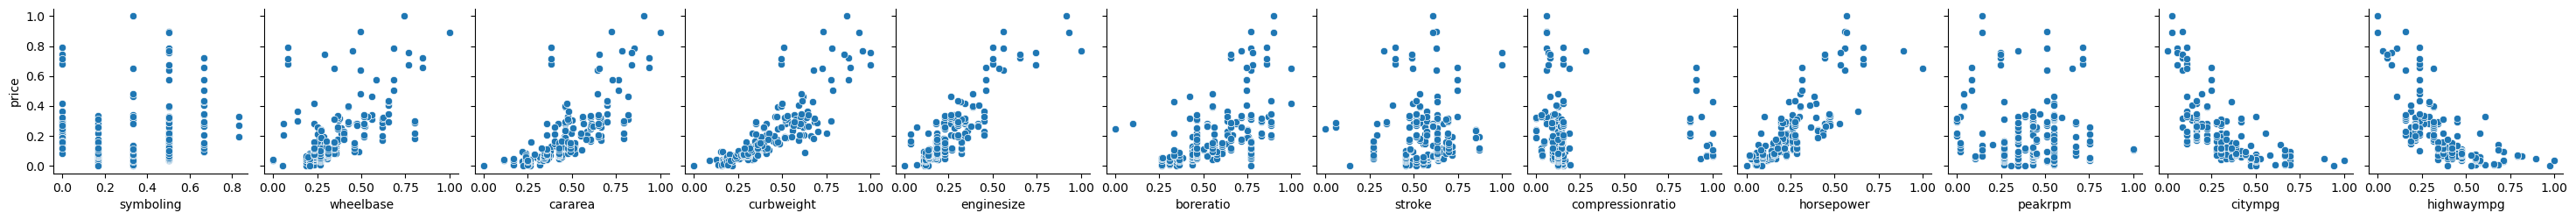

In [6]:
sns.pairplot(data = car_prices, x_vars = ['symboling', 'wheelbase', 'cararea', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], y_vars = ['price'], diag_kind = 'kde')
plt.show()

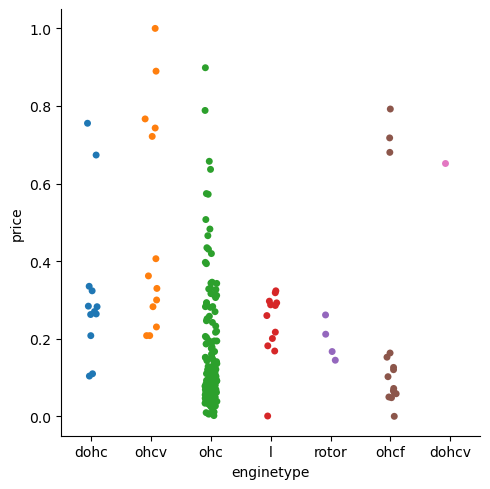

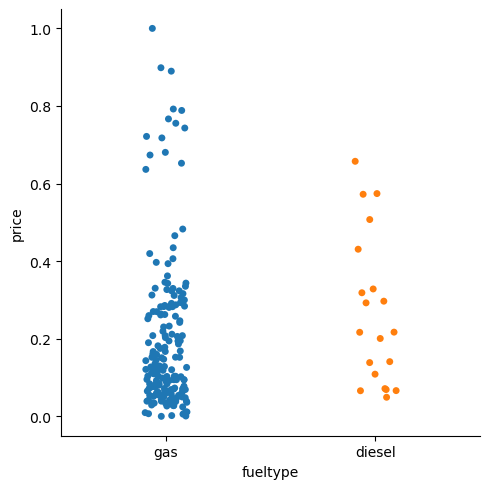

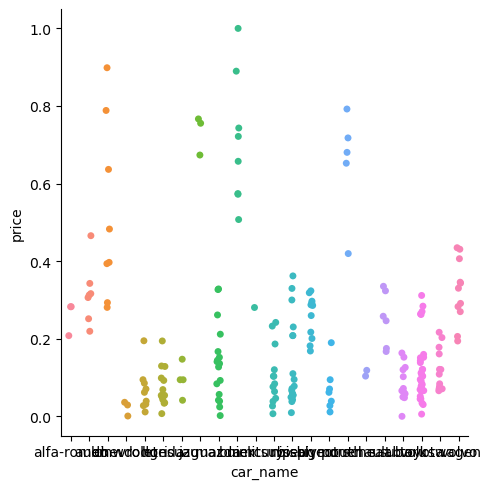

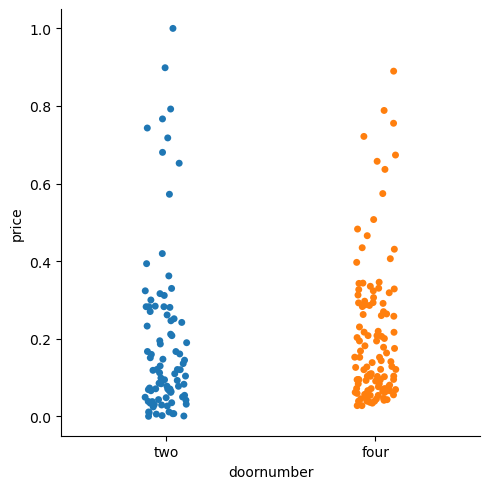

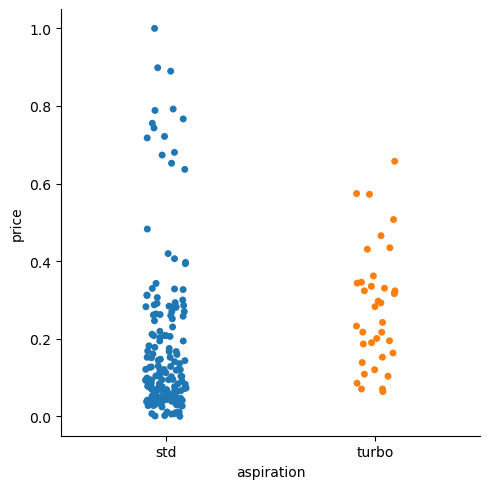

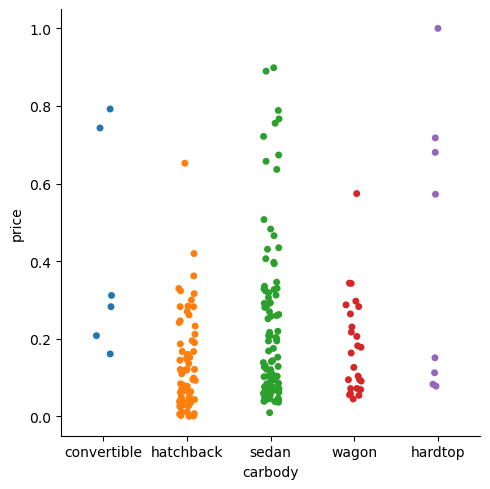

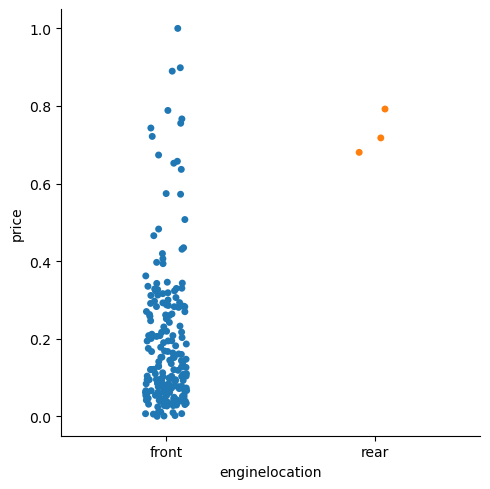

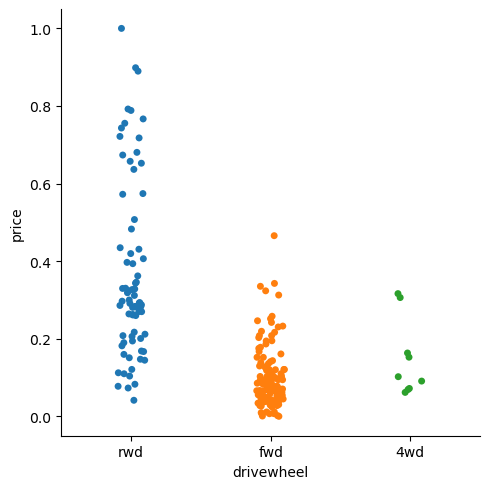

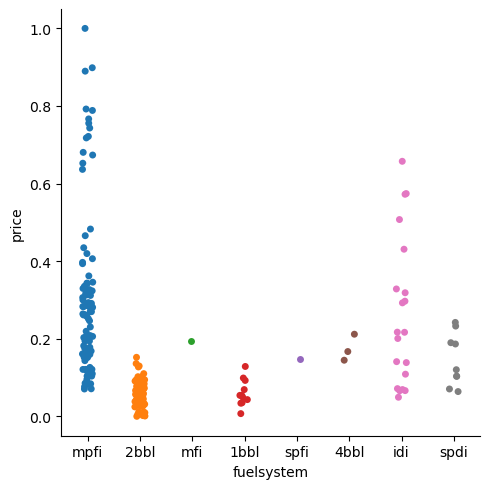

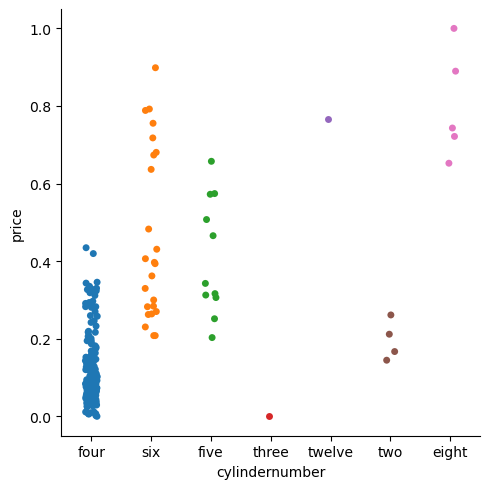

In [7]:
sns.catplot(data = car_prices, x = 'enginetype', y = 'price')
sns.catplot(data = car_prices, x = 'fueltype', y = 'price')
sns.catplot(data = car_prices, x = 'car_name', y = 'price')
sns.catplot(data = car_prices, x = 'doornumber', y = 'price')
sns.catplot(data = car_prices, x = 'aspiration', y = 'price')
sns.catplot(data = car_prices, x = 'carbody', y = 'price')
sns.catplot(data = car_prices, x = 'enginelocation', y = 'price')
sns.catplot(data = car_prices, x = 'drivewheel', y = 'price')
sns.catplot(data = car_prices, x = 'fuelsystem', y = 'price')
sns.catplot(data = car_prices, x = 'cylindernumber', y = 'price')
plt.show()

In [8]:
car_prices = car_prices.drop(["symboling", "compressionratio", "stroke", "carheight", "peakrpm", "doornumber", "enginelocation", "cylindernumber", "fuelsystem", "fueltype", "aspiration", "citympg", "highwaympg"], axis = 1)

In [9]:
car_prices

car_name      carbody drivewheel  wheelbase  curbweight enginetype  \
car_id                                                                         
1       alfa-romeo  convertible        rwd   0.058309    0.411171       dohc   
2       alfa-romeo  convertible        rwd   0.058309    0.411171       dohc   
3       alfa-romeo    hatchback        rwd   0.230321    0.517843       ohcv   
4             audi        sedan        fwd   0.384840    0.329325        ohc   
5             audi        sedan        4wd   0.373178    0.518231        ohc   
...            ...          ...        ...        ...         ...        ...   
201          volvo        sedan        rwd   0.655977    0.567882        ohc   
202          volvo        sedan        rwd   0.655977    0.605508        ohc   
203          volvo        sedan        rwd   0.655977    0.591156       ohcv   
204          volvo        sedan        rwd   0.655977    0.670675        ohc   
205          volvo        sedan        rwd   0.655977    0.610551        ohc   

        enginesize  boreratio  horsepower     price   cararea  
car_id                                                         
1         0.260377   0.664286    0.262500  0.207959  0.360510  
2         0.260377   0.664286    0.262500  0.282558  0.360510  
3         0.343396   0.100000    0.441667  0.282558  0.421878  
4         0.181132   0.464286    0.225000  0.219254  0.496315  
5         0.283019   0.464286    0.279167  0.306142  0.501823  
...            ...        ...         ...       ...       ...  
201       0.301887   0.885714    0.275000  0.291123  0.701759  
202       0.301887   0.885714    0.466667  0.345738  0.698815  
203       0.422642   0.742857    0.358333  0.406311  0.701759  
204       0.316981   0.335714    0.241667  0.430763  0.701759  
205       0.301887   0.885714    0.275000  0.434611  0.701759  

[205 rows x 11 columns]

In [10]:
car_prices.dtypes

car_name       object
carbody        object
drivewheel     object
wheelbase     float64
curbweight    float64
enginetype     object
enginesize    float64
boreratio     float64
horsepower    float64
price         float64
cararea       float64
dtype: object

In [11]:
#car_prices['fueltype'].replace(['gas', 'diesel'], [1, 0], inplace = True)
#car_prices['aspiration'].replace(['std', 'turbo'], [1, 0], inplace = True)

car_prices.rename(columns = {'car_name':'name'}, inplace = True)


car_prices = pd.get_dummies(car_prices, columns = ['name', 'carbody', 'drivewheel', 'enginetype'], dtype = int)
car_prices

wheelbase  curbweight  enginesize  boreratio  horsepower     price  \
car_id                                                                       
1        0.058309    0.411171    0.260377   0.664286    0.262500  0.207959   
2        0.058309    0.411171    0.260377   0.664286    0.262500  0.282558   
3        0.230321    0.517843    0.343396   0.100000    0.441667  0.282558   
4        0.384840    0.329325    0.181132   0.464286    0.225000  0.219254   
5        0.373178    0.518231    0.283019   0.464286    0.279167  0.306142   
...           ...         ...         ...        ...         ...       ...   
201      0.655977    0.567882    0.301887   0.885714    0.275000  0.291123   
202      0.655977    0.605508    0.301887   0.885714    0.466667  0.345738   
203      0.655977    0.591156    0.422642   0.742857    0.358333  0.406311   
204      0.655977    0.670675    0.316981   0.335714    0.241667  0.430763   
205      0.655977    0.610551    0.301887   0.885714    0.275000  0.434611   

         cararea  name_alfa-romeo  name_audi  name_bmw  ...  drivewheel_4wd  \
car_id                                                  ...                   
1       0.360510                1          0         0  ...               0   
2       0.360510                1          0         0  ...               0   
3       0.421878                1          0         0  ...               0   
4       0.496315                0          1         0  ...               0   
5       0.501823                0          1         0  ...               1   
...          ...              ...        ...       ...  ...             ...   
201     0.701759                0          0         0  ...               0   
202     0.698815                0          0         0  ...               0   
203     0.701759                0          0         0  ...               0   
204     0.701759                0          0         0  ...               0   
205     0.701759                0          0         0  ...               0   

        drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_dohcv  \
car_id                                                                      
1                    0               1                1                 0   
2                    0               1                1                 0   
3                    0               1                0                 0   
4                    1               0                0                 0   
5                    0               0                0                 0   
...                ...             ...              ...               ...   
201                  0               1                0                 0   
202                  0               1                0                 0   
203                  0               1                0                 0   
204                  0               1                0                 0   
205                  0               1                0                 0   

        enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
car_id                                                                   
1                  0               0                0                0   
2                  0               0                0                0   
3                  0               0                0                1   
4                  0               1                0                0   
5                  0               1                0                0   
...              ...             ...              ...              ...   
201                0               1                0                0   
202                0               1                0                0   
203                0               0                0                1   
204                0               1                0                0   
205                0               1                0                0   



In [12]:
car_prices.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'price', 'cararea', 'name_alfa-romeo', 'name_audi', 'name_bmw',
       'name_buick', 'name_chevrolet', 'name_dodge', 'name_honda',
       'name_isuzu', 'name_jaguar', 'name_mazda', 'name_mercury',
       'name_mitsubishi', 'name_nissan', 'name_peugeot', 'name_plymouth',
       'name_porsche', 'name_renault', 'name_saab', 'name_subaru',
       'name_toyota', 'name_volkswagen', 'name_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

In [13]:
car_prices = car_prices.drop(['carbody_convertible', 'drivewheel_4wd', 'name_alfa-romeo', 'enginetype_dohcv'], axis = 1)
car_prices

wheelbase  curbweight  enginesize  boreratio  horsepower     price  \
car_id                                                                       
1        0.058309    0.411171    0.260377   0.664286    0.262500  0.207959   
2        0.058309    0.411171    0.260377   0.664286    0.262500  0.282558   
3        0.230321    0.517843    0.343396   0.100000    0.441667  0.282558   
4        0.384840    0.329325    0.181132   0.464286    0.225000  0.219254   
5        0.373178    0.518231    0.283019   0.464286    0.279167  0.306142   
...           ...         ...         ...        ...         ...       ...   
201      0.655977    0.567882    0.301887   0.885714    0.275000  0.291123   
202      0.655977    0.605508    0.301887   0.885714    0.466667  0.345738   
203      0.655977    0.591156    0.422642   0.742857    0.358333  0.406311   
204      0.655977    0.670675    0.316981   0.335714    0.241667  0.430763   
205      0.655977    0.610551    0.301887   0.885714    0.275000  0.434611   

         cararea  name_audi  name_bmw  name_buick  ...  carbody_sedan  \
car_id                                             ...                  
1       0.360510          0         0           0  ...              0   
2       0.360510          0         0           0  ...              0   
3       0.421878          0         0           0  ...              0   
4       0.496315          1         0           0  ...              1   
5       0.501823          1         0           0  ...              1   
...          ...        ...       ...         ...  ...            ...   
201     0.701759          0         0           0  ...              1   
202     0.698815          0         0           0  ...              1   
203     0.701759          0         0           0  ...              1   
204     0.701759          0         0           0  ...              1   
205     0.701759          0         0           0  ...              1   

        carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohc  \
car_id                                                                   
1                   0               0               1                1   
2                   0               0               1                1   
3                   0               0               1                0   
4                   0               1               0                0   
5                   0               0               0                0   
...               ...             ...             ...              ...   
201                 0               0               1                0   
202                 0               0               1                0   
203                 0               0               1                0   
204                 0               0               1                0   
205                 0               0               1                0   

        enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
car_id                                                                   
1                  0               0                0                0   
2                  0               0                0                0   
3                  0               0                0                1   
4                  0               1                0                0   
5                  0               1                0                0   
...              ...             ...              ...              ...   
201                0               1                0                0   
202                0               1                0                0   
203                0               0                0                1   
204                0               1                0                0   
205                0               1                0                0   

        enginetype_rotor  
car_id                    
1                      0  
2                      0  
3        

In [14]:
x = car_prices.iloc[:, :]
x = x.drop('price', axis = 1)
x.insert(0, 'X0', 1)
x

X0  wheelbase  curbweight  enginesize  boreratio  horsepower  \
car_id                                                                 
1        1   0.058309    0.411171    0.260377   0.664286    0.262500   
2        1   0.058309    0.411171    0.260377   0.664286    0.262500   
3        1   0.230321    0.517843    0.343396   0.100000    0.441667   
4        1   0.384840    0.329325    0.181132   0.464286    0.225000   
5        1   0.373178    0.518231    0.283019   0.464286    0.279167   
...     ..        ...         ...         ...        ...         ...   
201      1   0.655977    0.567882    0.301887   0.885714    0.275000   
202      1   0.655977    0.605508    0.301887   0.885714    0.466667   
203      1   0.655977    0.591156    0.422642   0.742857    0.358333   
204      1   0.655977    0.670675    0.316981   0.335714    0.241667   
205      1   0.655977    0.610551    0.301887   0.885714    0.275000   

         cararea  name_audi  name_bmw  name_buick  ...  carbody_sedan  \
car_id                                             ...                  
1       0.360510          0         0           0  ...              0   
2       0.360510          0         0           0  ...              0   
3       0.421878          0         0           0  ...              0   
4       0.496315          1         0           0  ...              1   
5       0.501823          1         0           0  ...              1   
...          ...        ...       ...         ...  ...            ...   
201     0.701759          0         0           0  ...              1   
202     0.698815          0         0           0  ...              1   
203     0.701759          0         0           0  ...              1   
204     0.701759          0         0           0  ...              1   
205     0.701759          0         0           0  ...              1   

        carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohc  \
car_id                                                                   
1                   0               0               1                1   
2                   0               0               1                1   
3                   0               0               1                0   
4                   0               1               0                0   
5                   0               0               0                0   
...               ...             ...             ...              ...   
201                 0               0               1                0   
202                 0               0               1                0   
203                 0               0               1                0   
204                 0               0               1                0   
205                 0               0               1                0   

        enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \
car_id                                                                   
1                  0               0                0                0   
2                  0               0                0                0   
3                  0               0                0                1   
4                  0               1                0                0   
5                  0               1                0                0   
...              ...             ...              ...              ...   
201                0               1                0                0   
202                0               1                0                0   
203                0               0                0                1   
204                0               1                0                0   
205                0               1                0                0   

        enginetype_rotor  
car_id                    
1                      0  
2                      0  
3                      0  
4                      0  
5                      0  
...   

In [15]:
y = car_prices.iloc[:, 5]
y

car_id
1      0.207959
2      0.282558
3      0.282558
4      0.219254
5      0.306142
         ...   
201    0.291123
202    0.345738
203    0.406311
204    0.430763
205    0.434611
Name: price, Length: 205, dtype: float64

In [16]:
x = x.to_numpy()
y = y.to_numpy()
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 25)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 25)
type(x_train)

numpy.ndarray

In [18]:
m = x_train.shape[0]
n = x_train.shape[1]
m, n

(155, 40)

In [34]:
beta = np.ones(n)
np.reshape(beta, (40,1))

def cost(x, y, w):
    
    cost = (1/(2*m))*np.transpose((x@w - y))@(x@w - y)
    return cost

In [37]:
a = 0.5
cost_list = []
for i in range(50000):
    
    beta = beta - a*(1/m)*np.transpose(x_train)@(x_train@beta - y_train)
           
    cost_val = cost(x_train, y_train, beta)
    cost_list.append(cost_val)

cost_list

[0.0008108288768832282,
 0.0008108288768694019,
 0.0008108288768555776,
 0.0008108288768417555,
 0.000810828876827936,
 0.0008108288768141184,
 0.0008108288768003035,
 0.0008108288767864902,
 0.0008108288767726796,
 0.0008108288767588709,
 0.0008108288767450648,
 0.000810828876731261,
 0.0008108288767174591,
 0.0008108288767036596,
 0.0008108288766898623,
 0.0008108288766760673,
 0.0008108288766622747,
 0.0008108288766484843,
 0.0008108288766346962,
 0.0008108288766209097,
 0.0008108288766071261,
 0.0008108288765933447,
 0.0008108288765795656,
 0.0008108288765657883,
 0.0008108288765520138,
 0.0008108288765382412,
 0.0008108288765244705,
 0.0008108288765107027,
 0.0008108288764969372,
 0.0008108288764831733,
 0.0008108288764694122,
 0.000810828876455653,
 0.0008108288764418963,
 0.0008108288764281416,
 0.000810828876414389,
 0.000810828876400639,
 0.0008108288763868912,
 0.0008108288763731453,
 0.0008108288763594022,
 0.0008108288763456611,
 0.0008108288763319222,
 0.000810828876318185

In [38]:
lowest = 1
ind = 0
cntr = 0
cntr_= 0
for i in cost_list:
    cntr += 1
    if lowest >= i:
        lowest = i
        cntr_= cntr
cntr_

50000

In [39]:
x_train.shape, beta.shape

((155, 40), (40,))

In [40]:
x_train_final = x_train@(beta)
x_train_final.shape

(155,)

In [41]:
(y_train[0] - x_train_final[0])/y_train[0]*100

-7.0549431409583585

In [42]:
x_train_final[0], y_train[0]

(0.311661118666903, 0.29112258577031924)

In [43]:
x_val_final = x_val@beta

In [44]:
x_val_final[0], y_val[0]

(0.09912029699105306, 0.08393327044337422)

In [45]:
accuracy = ((np.sum(y_val) - np.sum(x_val_final))/(np.sum(y_val)))*100
accuracy

-6.8133480618056